In [1]:
import numpy as np
import pandas as pd
import glob
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def getListCount(df,title):
    listOfterms = df[title].value_counts()
    return listOfterms[1:]

In [3]:
def returnFullAbst(df):
    index_final = 0
    for index, row in df.iterrows():
        if(index != row['ID']-1):
            index_final = index
            break
    return df.iloc[index_final:].reset_index(drop=True)

In [4]:
def returnHeaderAndContent(df):
    for index, row in df.iterrows():
        if(index != row['ID']-1):
                index_title = index
                break
    temp = index_title
    count = temp
    while temp == count:
        if(df.iloc[temp-1]['FORM'] != df.iloc[index_title-1]['FORM']):
            break
        count = count + index_title
        temp  = temp + index_title
    return  df.iloc[:temp-index_title].reset_index(drop=True), df.iloc[temp-index_title:].reset_index(drop=True)

In [5]:
path = "."
directories = os.listdir( path )
try:
    directories.remove('.ipynb_checkpoints')
    directories.remove('Untitled.ipynb')
except:
  print("Erro")

In [6]:
def getListCount(df,title):
    listOfterms = df[title].value_counts()
    return listOfterms

def getPlot(df,label,fileName):
    sns.set(style="whitegrid")
    fig = plt.figure(figsize=(23, 10))
    fig.subplots_adjust(bottom=0.4)
    plt.xticks(rotation=70)
    ax = sns.barplot(x="index", y=label, data=df)
    fig.savefig(fileName)

In [7]:
columns = ['ID', 'FORM' ,'LEMMA' ,'PLEMMA' ,'POS' ,'PPOS' ,'FEAT' ,'PFEAT' ,'HEAD' ,'PHEAD' ,'DEPREL' ,'PDEPREL','FILLPRED','PRED','APRED']
df_all_sum = pd.DataFrame(columns=columns)
df_head_sum = pd.DataFrame(columns=columns)
df_content_sum = pd.DataFrame(columns=columns)
df_title_sum  = pd.DataFrame(columns=columns)
df_tempo  = pd.DataFrame(columns=columns)
for directory in directories:
    columns = ['ID', 'FORM' ,'LEMMA' ,'PLEMMA' ,'POS' ,'PPOS' ,
       'FEAT' ,'PFEAT' ,'HEAD' ,'PHEAD' ,'DEPREL' ,'PDEPREL','FILLPRED','PRED','APRED']
    listOfFiles = []
    folderPath = ".//{}".format(directory)
    files = os.listdir( folderPath )
    for fl in files:
        if(fl.endswith('.conll')):
            listOfFiles.append("{}//{}".format(folderPath,fl))
    for i in listOfFiles:
            try:
                df_tempo  = pd.DataFrame(columns=columns)
                df_all = pd.read_csv(i,sep="\t",names=columns)
                df_title, df_temp = returnHeaderAndContent(df_all)
                df_head, df_content = returnHeaderAndContent(df_temp)
                df_title_sum =   df_title_sum.append(df_title)
                df_tempo = df_head.append(df_content)
                df_all_sum =     df_all_sum.append(df_tempo) 
                df_head_sum =    df_head_sum.append(df_head) 
                df_content_sum = df_content_sum.append(df_content)
            except:
                print(i)

In [8]:
list_all = getListCount(df_all_sum,'PRED')[1:].to_frame().reset_index()
list_head  = getListCount(df_head_sum,'PRED')[1:].to_frame().reset_index()
list_content = getListCount(df_content_sum,'PRED')[1:].to_frame().reset_index()

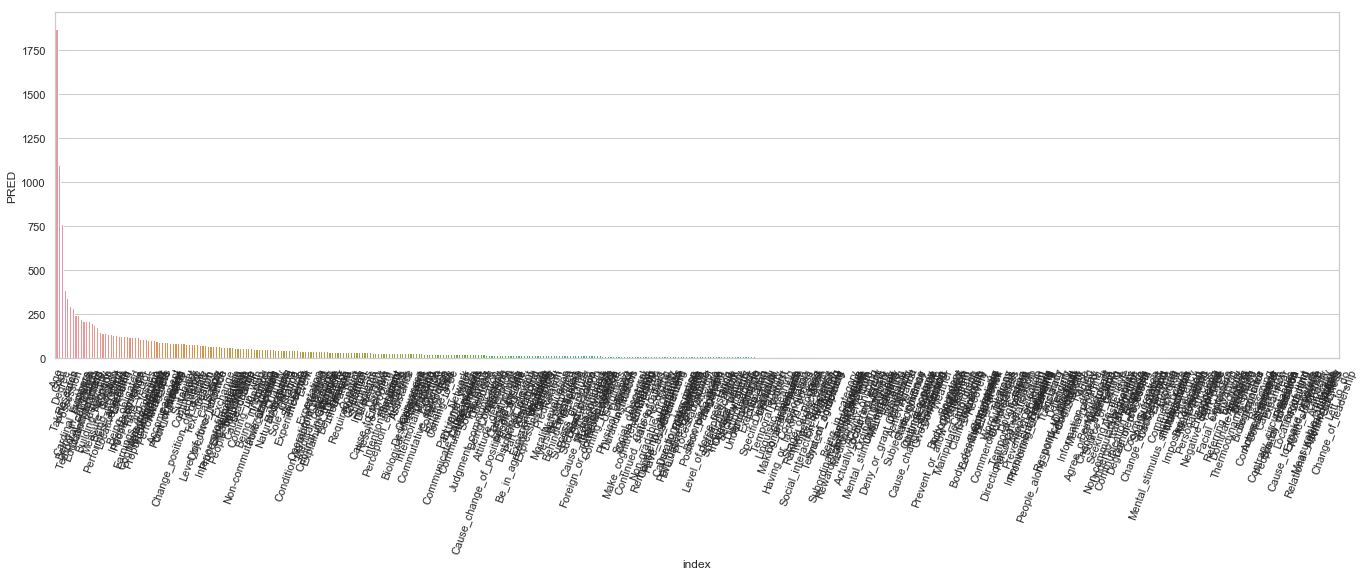

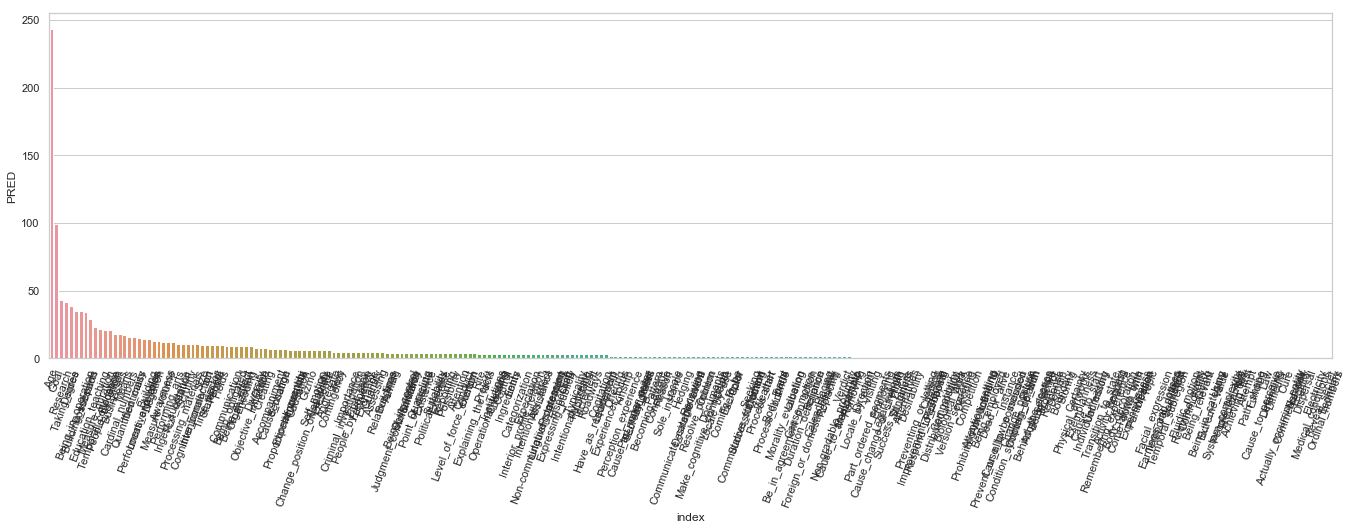

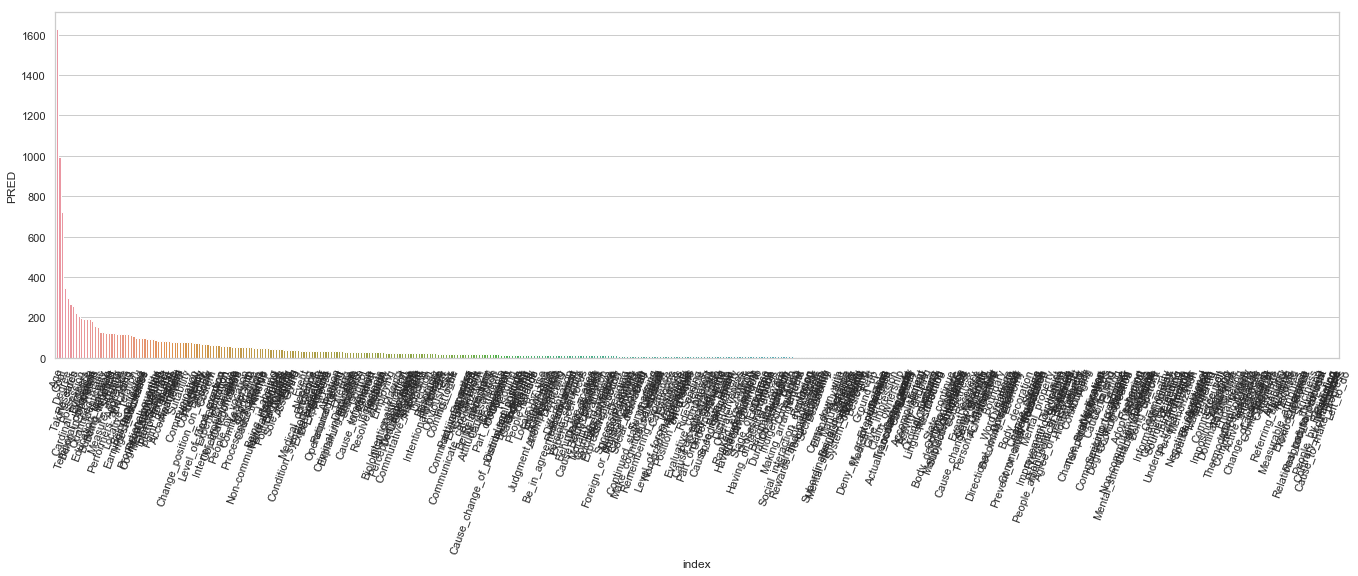

In [9]:
list_all.to_excel("list_all.xls", index = None, header=True)
getPlot(list_all,"PRED","_all.png")
list_head.to_excel("list_head.xls", index = None, header=True)
getPlot(list_head,"PRED","_head.png")
list_content.to_excel("list_content.xls", index = None, header=True)
getPlot(list_content,"PRED","_content.png")